In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('bank_xcel.xlsx')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
print(df.shape)
print(df.head())
df = df.drop(df[df.eq('unknown').any(axis=1)].index)
df = df.drop(df[df.eq('other').any(axis=1)].index)
print(df.describe(include='all'))
print(f'null:\n{df.isnull().sum()}')


(4521, 17)
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
               age         job  marital  education default       balance  \
count   581.000000      

In [ ]:
category_mapping = {
    'nonexistent': -1,
    'failure': 0,
    'success': 1
}
category_mapping_target = {
    'no': 0,
    'yes': 1
}

df['poutcome'] = df['poutcome'].replace(category_mapping)
df['y'] = df['y'].replace(category_mapping_target)

In [ ]:
label_encoder = LabelEncoder()
categorical_vars = ['job','marital', 'education','default','housing',	'loan','contact']
for var in categorical_vars:
    df[var] = label_encoder.fit_transform(df[var])

In [ ]:
y = df['y']
X = df.drop(columns = ['day', 'month', 'duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pridiction: [0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0
 0 0 1 0 0 0]
Accuracy: 1.0


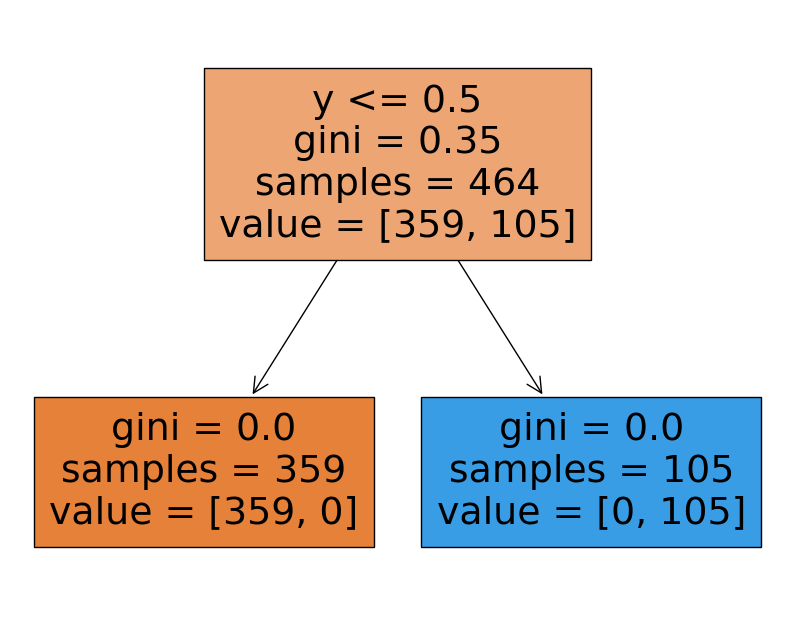

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("pridiction:",y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#Visualize the decision tree
#Gini index calculates the amount of probability of a specific feature that
#is classified incorrectly when selected randomly
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()